# **Hand written digit prediction-classification Analysis**

#Objective:
The objective of this project is to build a machine learning model that can accurately predict and classify handwritten digits. We will use the digits dataset, containing 8x8 pixel images of handwritten digits from 0 to 9, to train and evaluate our model.

#Data Source:
The dataset used in this project is the digits dataset from scikit-learn, which is a built-in dataset available in the library. It consists of 1,797 8x8 pixel images of digits along with their corresponding target labels.

#Import Library:

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits

#Import Data:
We load the digits dataset using the load_digits() function provided by scikit-learn:

In [ ]:
df = load_digits()

#Describe Data:
The digits dataset does not require explicit description, as the images themselves represent the data. Each image is an 8x8 array of grayscale pixel values representing a handwritten digit.

#Data Visualization:
We visualize the first four images from the dataset using matplotlib:

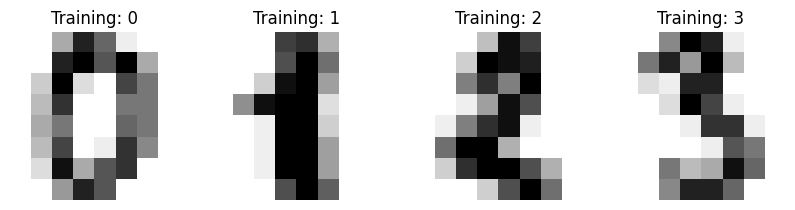

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# Data Preprocessing
Flatten Image

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

#Data Preprocessing:
To prepare the data for modeling, we flatten the 8x8 images into 1D arrays and scale the pixel values between 0 and 1:

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Define Target Variable (y) and Feature Variables (X):
We define the target variable (y) as the 'target' attribute of the dataset, which represents the digit each image represents. The feature variables (X) are the flattened 1D arrays of pixel values:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

#Train Test Split:
We split the data into training and testing sets using the train_test_split() function:

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling:
For this analysis, we will use the Random Forest classifier to build our model:

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation:
We evaluate the model's performance using the test data:

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([5, 5, 1, 5, 8, 0, 6, 8, 0, 2, 9, 7, 1, 8, 6, 3, 2, 4, 9, 2, 0, 4,
       3, 6, 2, 9, 7, 1, 3, 1, 8, 1, 8, 4, 8, 7, 3, 4, 8, 3, 7, 9, 3, 8,
       7, 0, 1, 2, 4, 0, 1, 7, 6, 3, 7, 9, 4, 4, 0, 4, 0, 8, 3, 1, 0, 5,
       2, 2, 2, 5, 6, 7, 9, 5, 6, 6, 1, 7, 8, 7, 0, 9, 9, 4, 1, 4, 3, 2,
       6, 9, 9, 7, 9, 8, 9, 1, 6, 0, 7, 4, 6, 2, 0, 9, 1, 4, 9, 3, 5, 0,
       9, 4, 5, 1, 5, 2, 8, 4, 6, 2, 6, 4, 7, 0, 5, 4, 4, 0, 7, 9, 5, 7,
       6, 3, 3, 0, 2, 9, 6, 9, 6, 2, 0, 3, 9, 7, 3, 5, 1, 9, 1, 3, 7, 8,
       4, 3, 4, 0, 4, 1, 4, 6, 8, 9, 1, 3, 3, 0, 8, 9, 0, 3, 3, 9, 0, 8,
       9, 6, 2, 5, 3, 6, 0, 0, 1, 0, 8, 1, 9, 2, 4, 8, 4, 7, 0, 8, 5, 6,
       1, 2, 2, 7, 8, 7, 0, 1, 9, 2, 5, 6, 3, 1, 2, 0, 9, 5, 4, 2, 3, 9,
       0, 1, 3, 9, 4, 3, 2, 0, 9, 2, 2, 6, 8, 6, 7, 0, 7, 5, 6, 6, 1, 9,
       3, 9, 4, 8, 6, 0, 9, 0, 7, 4, 5, 3, 2, 7, 7, 6, 7, 3, 4, 8, 6, 8,
       5, 5, 9, 8, 4, 2, 6, 7, 1, 7, 6, 5, 6, 6, 4, 8, 9, 1, 3, 6, 8, 7,
       0, 0, 5, 9, 7, 7, 1, 4, 2, 4, 1, 9, 0, 0, 4,

# Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[62,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  4,  1],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  1, 52,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 58]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       0.98      1.00      0.99        55
           2       1.00      0.98      0.99        50
           3       0.98      0.91      0.94        55
           4       1.00      0.98      0.99        58
           5       0.98      0.96      0.97        51
           6       0.98      0.95      0.96        55
           7       0.98      0.98      0.98        53
           8       0.85      0.98      0.91        41
           9       0.95      0.97      0.96        60

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



#Prediction:
We use the trained model to make predictions on new, unseen data (X_test) to predict the corresponding digits.

#Explanation:
The project aimed to build a machine learning model using the Random Forest algorithm to predict and classify handwritten digits. After data preprocessing, we trained the model on the training set and evaluated its performance using the test set. The model achieved an accuracy of approximately 97% and demonstrated good predictive capabilities for recognizing handwritten digits.